# Load Files and libraries

In [3]:
import numpy as np
from skimage import data, io
from skimage.registration import phase_cross_correlation # new form of register_translation
from scipy.ndimage import shift
import napari
import glob
import gc
import sys

from sys import getsizeof # To know the size of the variables in bytes
from aicsimageio import AICSImage
import tifffile

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.transform import warp_polar, rotate, rescale
from skimage.util import img_as_float

In [25]:
a = np.ones((25000,20000), dtype='uint16')
print(getsizeof(a)/10**6, type(a[5,5]))

1000.000112 <class 'numpy.uint16'>


In [108]:
#angle = 30

image = img[-1,:,:]
rotated = rot[-1,:,:]
#rotated = rotate(rotated, angle)

In [109]:
radius = 2000

image_polar = warp_polar(image, radius=radius, multichannel=False)
rotated_polar = warp_polar(rotated, radius=radius, multichannel=False)

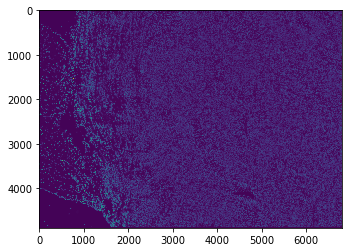

In [110]:
imgplot = plt.imshow(image)

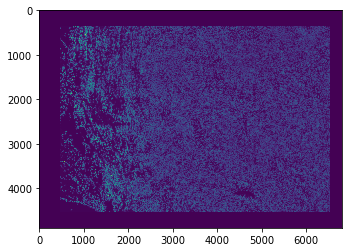

In [111]:
imgplot = plt.imshow(rotated)

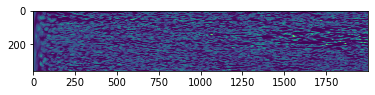

In [112]:
imgplot = plt.imshow(image_polar)

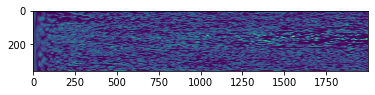

In [113]:
imgplot = plt.imshow(rotated_polar)

In [114]:
shifts, error, phasediff = phase_cross_correlation(image_polar, rotated_polar)

print(shifts[0])
changed = rotate(rotated, -shifts[0]/2)



1.0


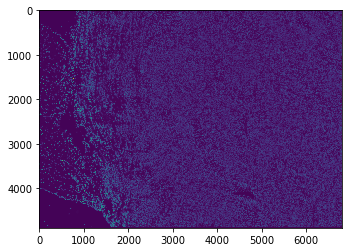

In [115]:
imgplot = plt.imshow(image)

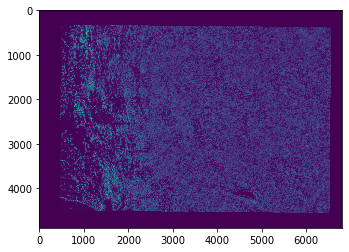

In [116]:
imgplot = plt.imshow(changed)

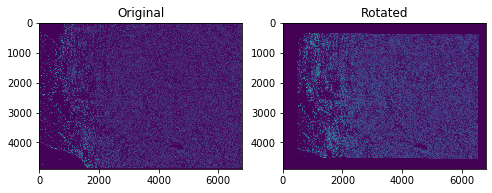

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original")
ax[0].imshow(image)
ax[1].set_title("Rotated")
ax[1].imshow(changed)
plt.show()

In [40]:
with tifffile.TiffWriter('./r25rot.tif',
                                 bigtiff = True) as tif:
    tif.save(changed)
print('Saved!')

Saved!


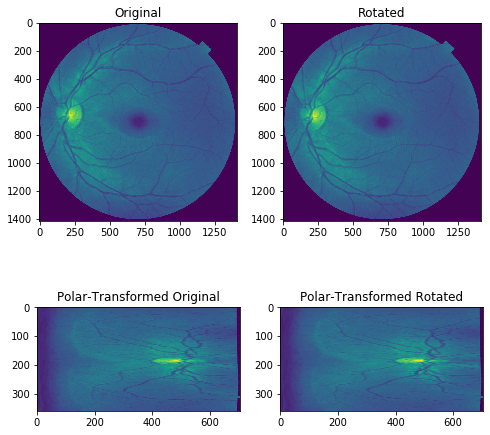

Expected value for counterclockwise rotation in degrees: 0.7
Recovered value for counterclockwise rotation: 1.0


In [121]:
#https://scikit-image.org/docs/dev/auto_examples/registration/plot_register_rotation.html

radius = 705
angle = 0.7
image = data.retina()
image = img_as_float(image[:,:,2])
rotated = rotate(image, angle)
image_polar = warp_polar(image, radius=radius, multichannel=False)
rotated_polar = warp_polar(rotated, radius=radius, multichannel=False)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.ravel()
ax[0].set_title("Original")
ax[0].imshow(image)
ax[1].set_title("Rotated")
ax[1].imshow(rotated)
ax[2].set_title("Polar-Transformed Original")
ax[2].imshow(image_polar)
ax[3].set_title("Polar-Transformed Rotated")
ax[3].imshow(rotated_polar)
plt.show()

shifts, error, phasediff = phase_cross_correlation(image_polar, rotated_polar)
print("Expected value for counterclockwise rotation in degrees: "
      f"{angle}")
print("Recovered value for counterclockwise rotation: "
      f"{shifts[0]}")

In [119]:
shifts

array([34.,  0.])

In [2]:
x = 17
y = 11

a = np.ones((2,5), dtype = np.int16)
b = np.pad(a,(1,2),'constant')

xa = np.shape(a)[0]; xb = np.shape(b)[0]
ya = np.shape(a)[1]; yb = np.shape(b)[1]

print('new size wanted',x,y)
print('a shape:',xa,ya); print('b shape:',xb,yb)

xa_dif = x-xa; ya_dif = y-ya
print('a difference',xa_dif,ya_dif)
xb_dif = x-xb; yb_dif = y-yb
print('b difference',xb_dif,yb_dif)
print('What needs to be added on the edges:',(xa_dif)/2,(ya_dif)/2)
new_a = np.pad(a,((int(np.floor((xa_dif)/2)), int(np.ceil((xa_dif)/2)))
               ,(int(np.floor((ya_dif)/2)), int(np.ceil((ya_dif)/2)))),'constant')
new_b = np.pad(b,((int(np.floor((xb_dif)/2)), int(np.ceil((xb_dif)/2)))
               ,(int(np.floor((yb_dif)/2)), int(np.ceil((yb_dif)/2)))),'constant')

print('new_a',np.shape(new_a))
print('new_b',np.shape(new_b))

new size wanted 17 11
a shape: 2 5
b shape: 5 8
a difference 15 6
b difference 12 3
What needs to be added on the edges: 7.5 3.0
new_a (17, 11)
new_b (17, 11)


In [3]:
a = np.ones((1,2,3))
a = 4*a
b = np.ones((2,2,3))

c = np.concatenate((b,a),axis=0)
print(c, np.shape(c))

d = np.concatenate((np.reshape(c[-1],(1,np.shape(c)[1],np.shape(c)[2])),c[:-1]), axis = 0)
print(d, np.shape(d))

[[[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[4. 4. 4.]
  [4. 4. 4.]]] (3, 2, 3)
[[[4. 4. 4.]
  [4. 4. 4.]]

 [[1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]]] (3, 2, 3)


In [4]:
def ask_for_approval():
    hasApproval = False

    while not hasApproval:
        user_input = input('Continue with image processing for the above files? (Yes/No): ').strip().lower()

        if user_input == 'yes' or user_input == 'y':
            hasApproval = True
        elif user_input == 'no' or user_input == 'n':
            print('Terminating image processing.')
            exit()
        else:
            print('Please enter a valid option.')
    
def get_tiffiles(source):
    return glob.glob(source + '/**/*.tif', recursive=True)

def list_files(source, files):
    file_names = '\n'.join(files)
    file_list = f'''Found the following image files in {source}: \n\n{file_names}\n'''
    print(file_list)

In [5]:
def get_max_shape(source):
    
    filepath = glob.glob(source + '/**/*.txt', recursive=True)
    print ('Getting max dimensions with: ',filepath)
    file = open(filepath[0],'r')
    images_shape = file.read()
    split = images_shape.split(';')
    xmax = 0
    ymax = 0
    print(split)
    #print('------------------------',xmax,ymax)
    for i in range(len(split)-1):
        frag = split[i].split(',')
        xmax = max(xmax,int(frag[1]))
        ymax = max(ymax,int(frag[2]))
    print('(Xmax, Ymax) --------------- ',xmax,ymax)
        
    return xmax,ymax

def pad_images(xmax, ymax, image):
    #image must be of dimension X,Y so we input channels not the whole image C,X,Y
    x_diff = xmax - np.shape(image)[0]
    y_diff = ymax - np.shape(image)[1]

    padded_image = np.pad(image,((int(np.floor((x_diff)/2)), int(np.ceil((x_diff)/2)))
               ,(int(np.floor((y_diff)/2)), int(np.ceil((y_diff)/2)))),'constant')
    return padded_image

def align_images(source, dapi_target, processed_tif):

    aligned_images = []

    dapi_to_offset = processed_tif[-1]
    print('dapi_target shape', np.shape(dapi_target))
    print('dapi_to_offset shape', np.shape(dapi_to_offset))

    xmax, ymax = get_max_shape(source)
    print('Recalibrating image size to', xmax, ymax)
    max_dapi_target = pad_images(xmax, ymax, dapi_target)
    
    #padding of dapi_to_offset, calling it max_processed_tif to keep variables low
    max_processed_tif = pad_images(xmax, ymax, dapi_to_offset)

    shifted, error, diffphase = phase_cross_correlation(max_dapi_target, max_processed_tif)
    print(f"Detected subpixel offset (y, x): {shifted}")

    for channel in range(np.shape(processed_tif)[0]):
        max_processed_tif = pad_images(xmax, ymax, processed_tif[channel,:,:])
        aligned_images.append(shift(max_processed_tif, shift=(shifted[0], shifted[1]), mode='constant'))
        
    print('transformed channels done, image is of size', np.shape(aligned_images))
    return aligned_images

In [6]:
def save_reference(source, file, processed_tif0):
    reference_image = []
    #DAPI as first image
    xmax, ymax = get_max_shape(source)
    reference_image.append(pad_images(xmax, ymax, processed_tif0[-1]))
    for channel in range(np.shape(processed_tif0)[0]-1):
        reference_image.append(pad_images(xmax, ymax, processed_tif0[channel,:,:]))
        
    with tifffile.TiffWriter('./aligned/' + file[0].split()[0].split('/')[2].split('.')[0] + '_reference.tif',
                                 bigtiff = True) as tif:
        tif.save(reference_image)
    print('Saved Reference Image: ', file[0].split())

In [7]:
def get_aligned_images(source):
    # source needs to be a str of where are the tif stored
    files = get_tiffiles(source)
    list_files(source,files)
    
    #ask_for_approval()

    print ('Reference dapi is from:', files[0].split())
    processed_tif0 = tifffile.imread(files[0].split())
    dapi_target = processed_tif0[-1]
    
    #save_reference(source, files[0].split(), processed_tif0)
    #Do not need processed_tif0 only dapi_target from it
    del processed_tif0
    gc.collect()
    
    #for file in files[1:]:
    for file in files:
        print('--- Aligning tif i:', file.split())
        processed_tif = tifffile.imread(file.split())
        print('Shape of image i is: ', np.shape(processed_tif))
        align_tif = align_images(source, dapi_target, processed_tif)
        print('Saving aligned image')
        with tifffile.TiffWriter('./aligned/'+file.split()[0].split('/')[2].split('.')[0]+'_align.tif',
                                 bigtiff = True) as tif:
            tif.save(align_tif)
    print('DONE!')

In [8]:
def align_images(source, dapi_target, processed_tif):

    aligned_images = []
    
    #padding of dapi_to_offset, calling it max_processed_tif to keep variables low
    max_processed_tif = pad_images(xmax, ymax, dapi_to_offset)

    shifted, error, diffphase = phase_cross_correlation(max_dapi_target, max_processed_tif)
    print(f"Detected subpixel offset (y, x): {shifted}")

    for channel in range(np.shape(processed_tif)[0]):
        max_processed_tif = pad_images(xmax, ymax, processed_tif[channel,:,:])
        aligned_images.append(shift(max_processed_tif, shift=(shifted[0], shifted[1]), mode='constant'))
        
    print('transformed channels done, image is of size', np.shape(aligned_images))
    return aligned_images

In [9]:
def pad_images2(xmax, ymax, image):
    #image must be of dimension X,Y so we input channels not the whole image C,X,Y
    x_diff = xmax - np.shape(image)[0]
    y_diff = ymax - np.shape(image)[1]
    #pads (up,down), (left, right)
    padded_image = np.pad(image,((x_diff, 0),(0, y_diff)),'constant')
    return padded_image

In [10]:
fileName = 'r1_pr.tif'  # align1_processed_reference align2_processed
img = tifffile.imread('./output/'+fileName)
print('SHAPE', np.shape(img))
xmax = 19000
ymax = 23000


padded_images = []
for channel in range(np.shape(img)[0]):
    padded_images.append(pad_images2(xmax, ymax, img[channel,:,:]))
print('padded images done, image is of size', np.shape(padded_images))
padded_images = np.array(padded_images)
print(getsizeof(padded_images)/10**6,'MB')
with tifffile.TiffWriter('./output/testSize.tif',
                                 bigtiff = True) as tif:
    tif.save(padded_images)
print('Saved!')

SHAPE (5, 5283, 6282)
padded images done, image is of size (5, 19000, 23000)
4370.000128 MB
Saved!


In [21]:
fileName = 'r1_pr.tif'  # align1_processed_reference align2_processed
img = tifffile.imread('./output/'+fileName)
print('SHAPE', np.shape(img))
xmax = 25000
ymax = 20000


padded_images = []
for channel in range(1):
    padded_images.append(pad_images2(xmax, ymax, img[channel,:,:]))
print('padded images done, image is of size', np.shape(padded_images))
padded_images = np.array(padded_images)
print(getsizeof(padded_images)/10**6,'MB')
with tifffile.TiffWriter('./output/testSize.tif',
                                 bigtiff = True) as tif:
    tif.save(padded_images)
print('Saved!')

SHAPE (5, 5283, 6282)
padded images done, image is of size (1, 25000, 20000)
1000.000128 MB
Saved!


In [ ]:
fileName = 'align2_RU.tif'  # align1_processed_reference
img = AICSImage('./output/'+fileName)
with napari.gui_qt():
    viewer = napari.Viewer()
    viewer.add_image(img.get_image_data("ZYX", C=0, S=0, T=0))